### Data Source

P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf
  
### Field Definitions
* X: X-axis spatial coordinate within the Montesinho park map: 1 to 9
* Y: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
* month: Month of the year: 'jan' to 'dec'
* day: Day of the week: 'mon' to 'sun'
* FFMC: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
* DMC: Duff Moisture Code index from the FWI system: 1.1 to 291.3
* DC: Drought Code index from the FWI system: 7.9 to 860.6
* ISI: Initial Spread Index from the FWI system: 0.0 to 56.10
* temp: Temperature in Celsius degrees: 2.2 to 33.30
* RH: Relative humidity in percentage: 15.0 to 100
* wind: Wind speed in km/h: 0.40 to 9.40
* rain: Outside rain in mm/m2 : 0.0 to 6.4
* area: The burned area of the forest (in ha): 0.00 to 1090.84

### Load Libraries

In [128]:
library("readr")
library("dplyr")
library("ggplot2")
library("purrr")
library("repr")

options(repr.plot.width=6, repr.plot.height=3)

### Load Data, Initial Exploration

In [62]:
forest_fires <- read_csv("forestfires.csv")

Parsed with column specification:
cols(
  X = col_integer(),
  Y = col_integer(),
  month = col_character(),
  day = col_character(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  temp = col_double(),
  RH = col_integer(),
  wind = col_double(),
  rain = col_double(),
  area = col_double()
)


In [113]:
names(forest_fires)

[1] "X"     "Y"     "month" "day"   "FFMC"  "DMC"   "DC"    "ISI"   "temp" 
[10] "RH"    "wind"  "rain"  "area"

In [114]:
head(forest_fires)

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [115]:
summarize(fires, avg_ffmc = mean(FFMC),
          avg_dmc = mean(DMC),
          avg_dc = mean(DC),
          avg_isi = mean(ISI),
          avg_temp = mean(temp))

avg_ffmc,avg_dmc,avg_dc,avg_isi,avg_temp
90.64468,110.8723,547.94,9.021663,18.88917


## Bar Chars

### Bar Chart - Number of Fires by Month

In [65]:
# Reorder months to chronological order
forest_fires <- forest_fires %>%
  mutate(month = factor(month, levels = c("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec")))

In [66]:
fires_month <- forest_fires %>% group_by(month) %>% summarize(total_fires = n())

In [67]:
head(fires_month)

month,total_fires
jan,2
feb,20
mar,54
apr,9
may,2
jun,17


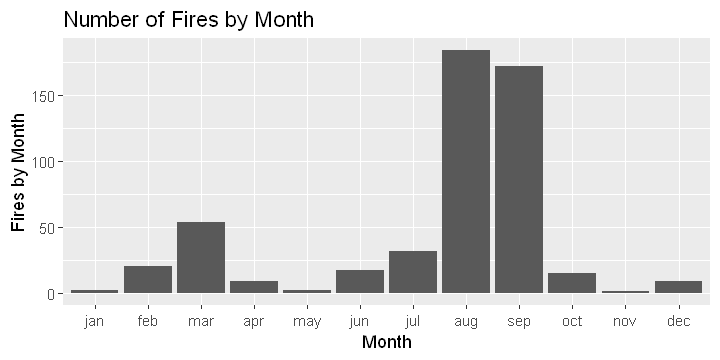

In [129]:
ggplot(data = fires_month) +
    aes(x = month, y = total_fires) +
    geom_bar(stat="identity") +
    labs(title = "Number of Fires by Month", x = "Month", y = "Fires by Month")

The summer months in the Northern Hemisphere (August and September) have significantly more fires than other months. This could be due to higher temperatures and drier conditions.

### Bar Chart - Number of Fires by Day of Week

In [71]:
# Reorder months to chronological order
forest_fires <- forest_fires %>%
  mutate(day = factor(day, levels = c("sun", "mon", "tue", "wed", "thu", "fri", "sat")))

In [72]:
fires_day <- forest_fires %>% group_by(day) %>% summarize(total_fires = n())

In [74]:
head(fires_day)

day,total_fires
sun,95
mon,74
tue,64
wed,54
thu,61
fri,85


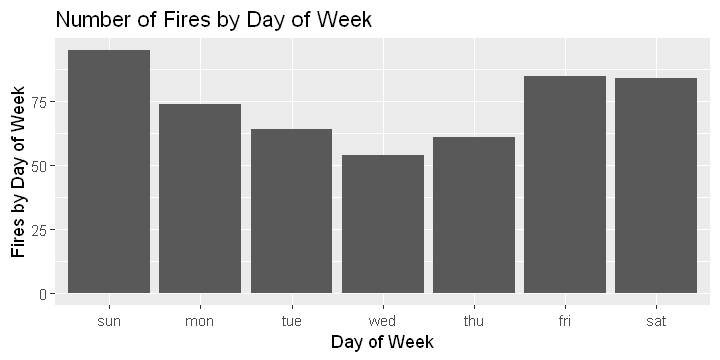

In [134]:
ggplot(data = fires_day) +
    aes(x = day, y = total_fires) +
    geom_bar(stat="identity") +
    labs(title = "Number of Fires by Day of Week", x = "Day of Week", y = "Fires by Day of Week")

There are more fires during the weekend (Friday-Sunday), than during the weekday. This could be due to more visitors to the forests during the weekends.

## Boxplots

In [86]:
create_boxplot = function(x_col, y_col) {
    ggplot(data = forest_fires) +
    aes_string(x = x_col, y = y_col) +
    geom_boxplot()
}

### Boxplots - Metrics By Month

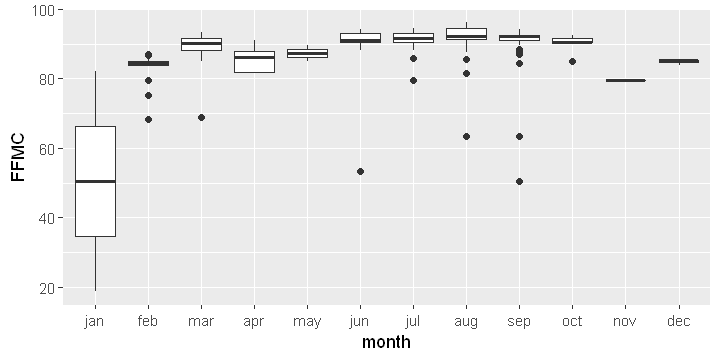

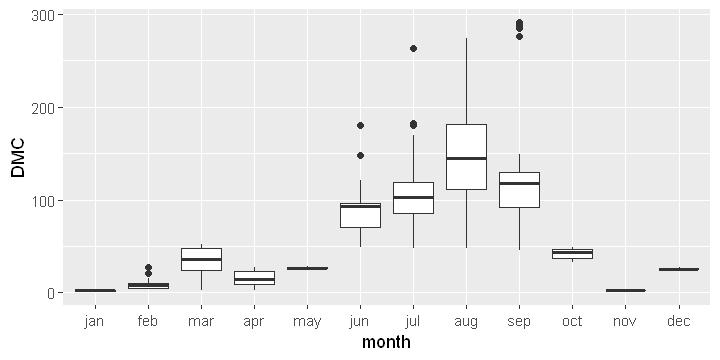

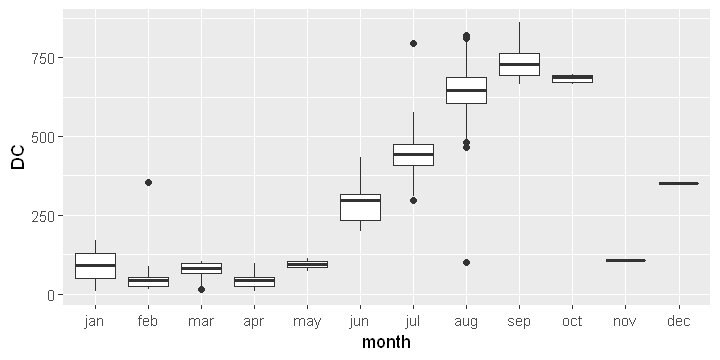

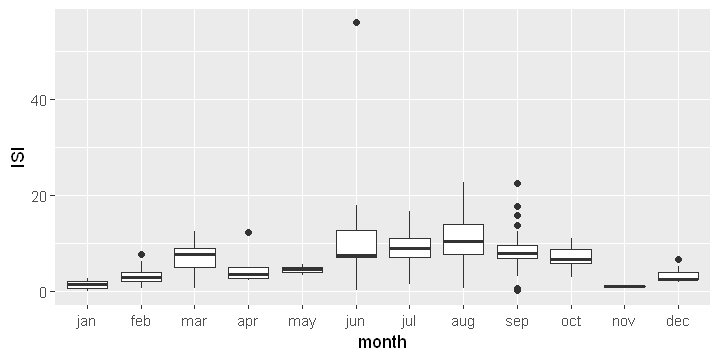

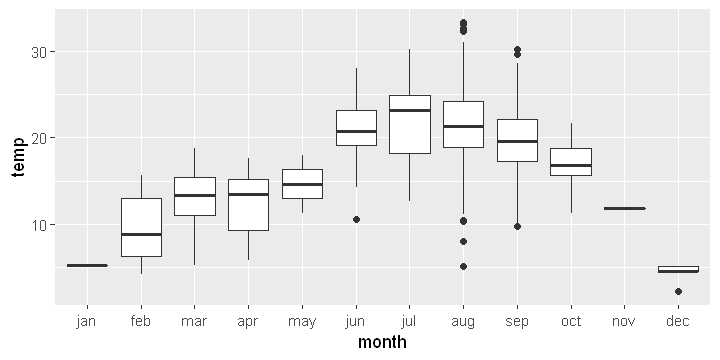

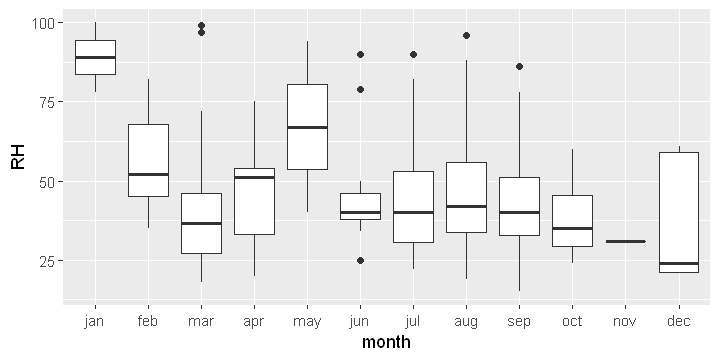

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


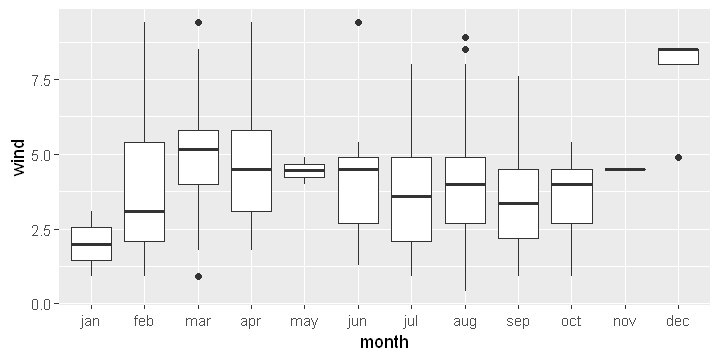

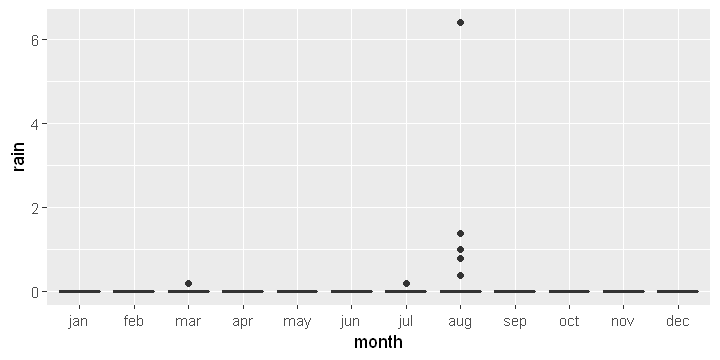

In [131]:
x_var_month <- names(forest_fires[3])
y_var <- names(forest_fires[5:12])
map2(x_var, y_var, create_boxplot)

There are clear variations among months. For example, December has noticably higher winds while July and August have high temperatures.

### Boxplots - Metrics by Day of Week

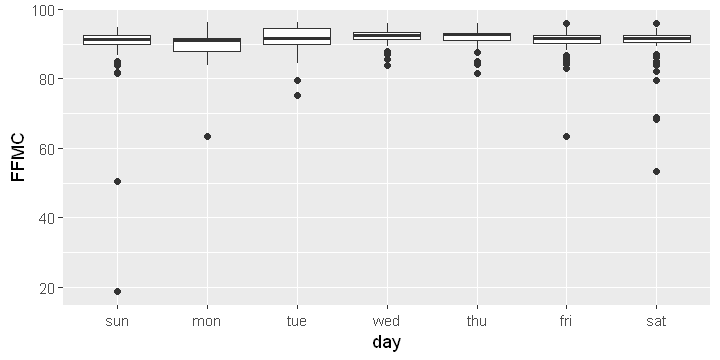

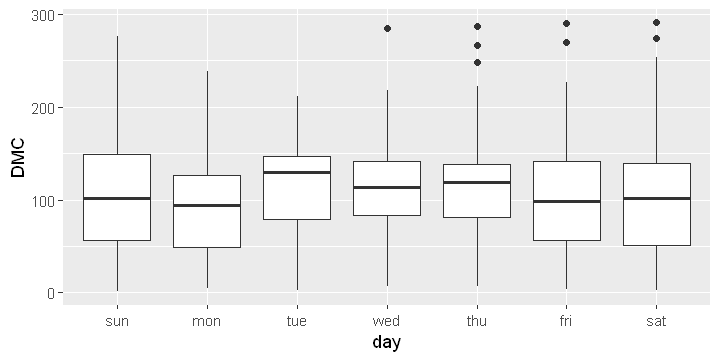

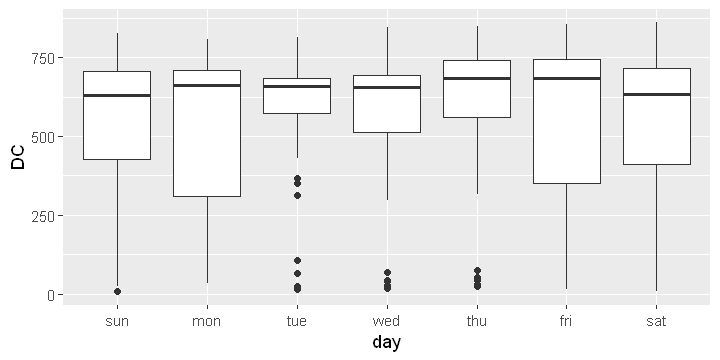

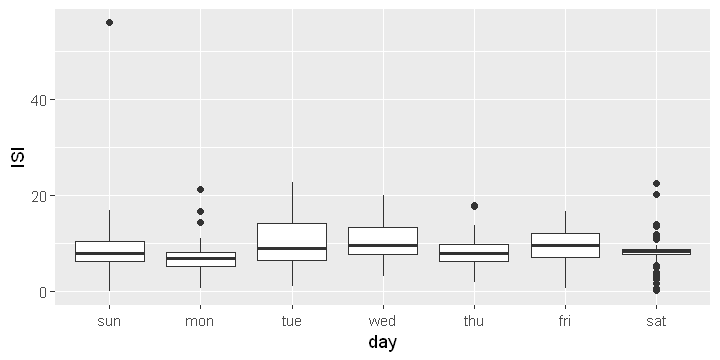

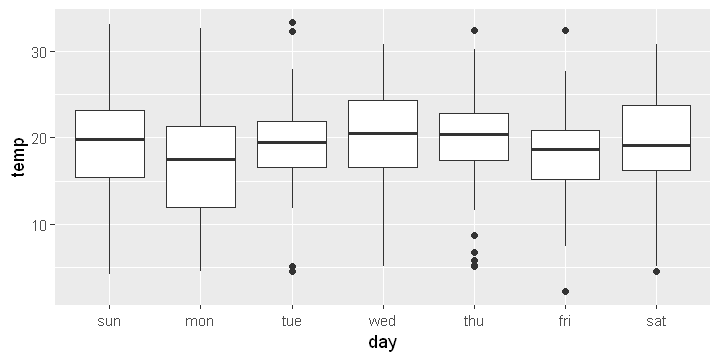

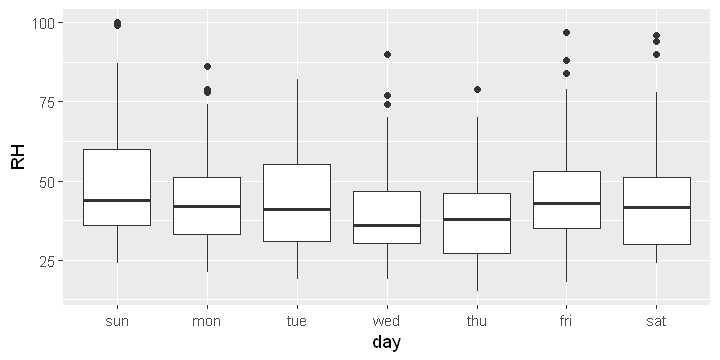

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


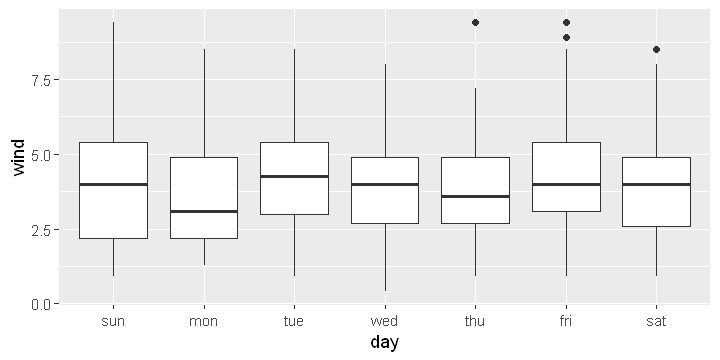

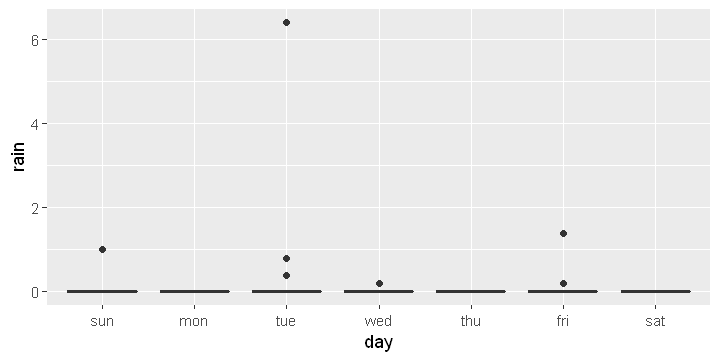

In [132]:
x_var_day <- names(forest_fires[4])
y_var <- names(forest_fires[5:12])
map2(x_var_day, y_var, create_boxplot)

The ranges of values seem to be fairly similar across the days of the week. There are also some high/low outliers.

## Scatterplots - Metrics vs. Area Burned

In [118]:
create_scatter = function(x_col, y_col) {
    ggplot(data = forest_fires) +
    aes_string(x = x_col, y = y_col) +
    geom_point(alpha = 0.3)
}

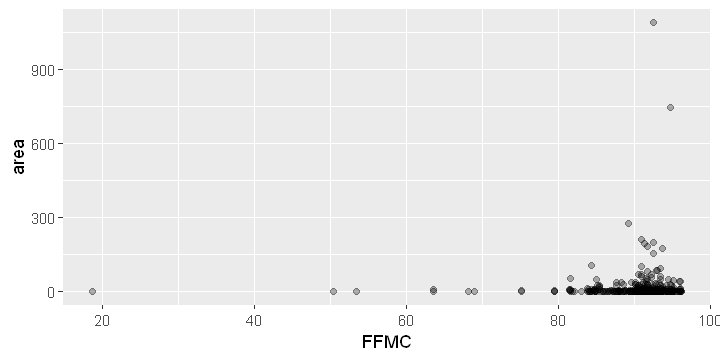

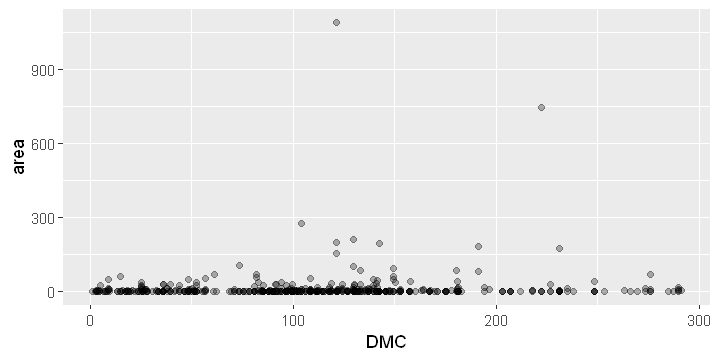

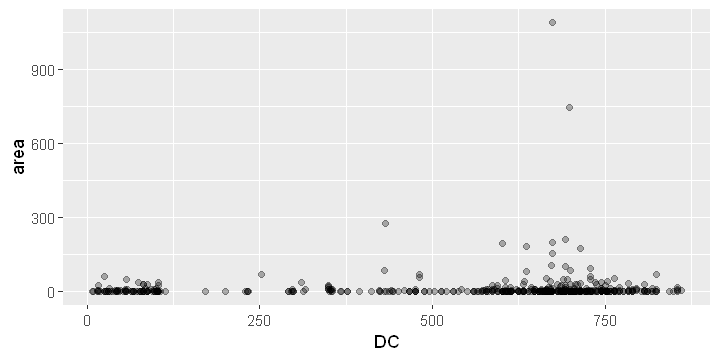

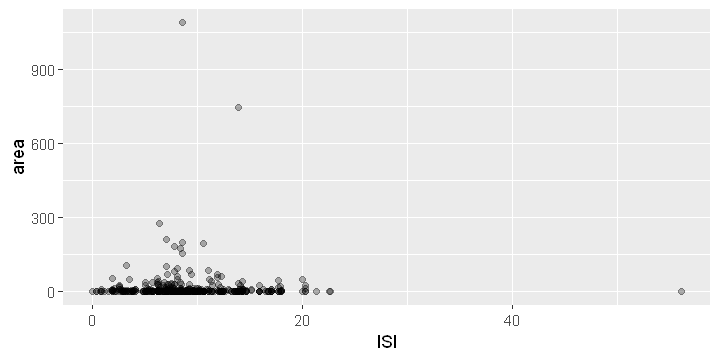

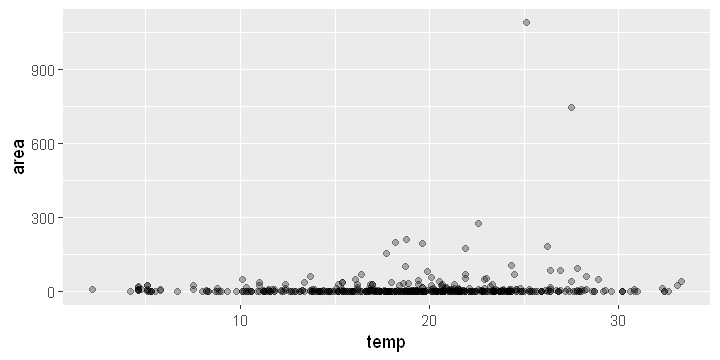

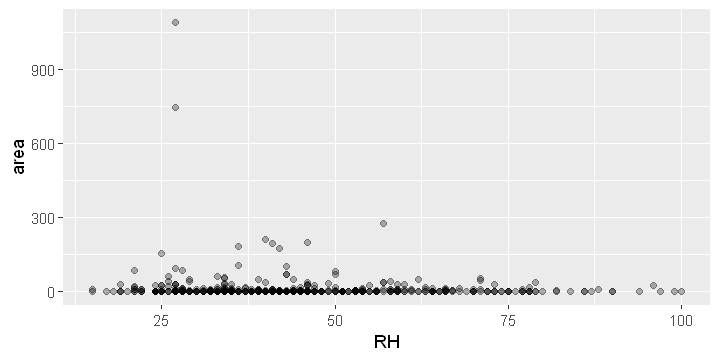

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]


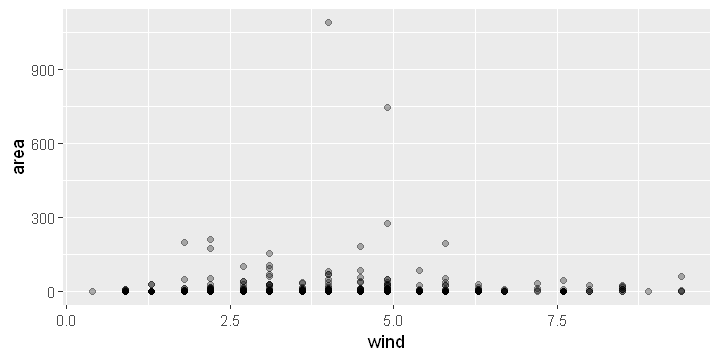

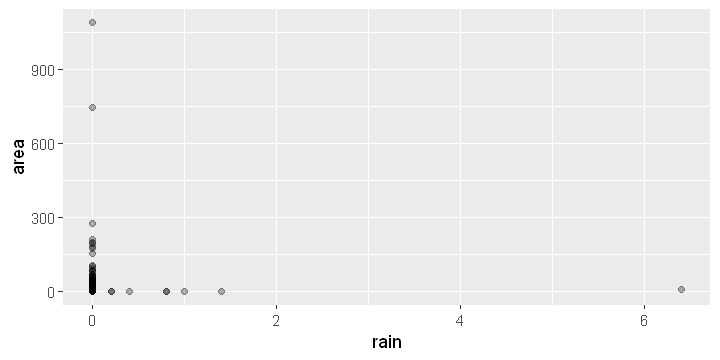

In [135]:
x_var_day <- names(forest_fires[5:12])
y_var <- names(forest_fires[13])
map2(x_var_day, y_var, create_scatter)

### Histogram - Number of Fires by Area Burned

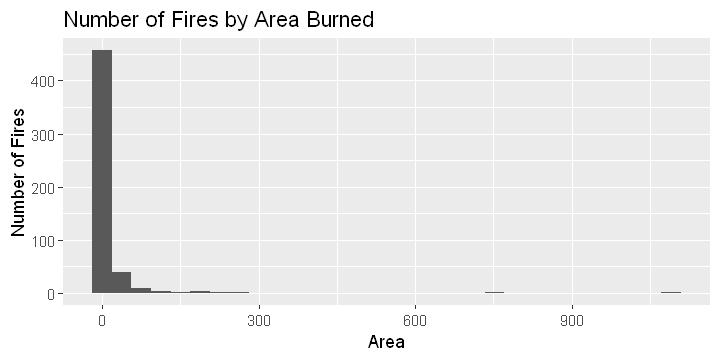

In [155]:
ggplot(data = forest_fires) +
    aes(area) +
    geom_histogram(bins = 30) +
    labs(title = "Number of Fires by Area Burned", x = "Area", y = "Number of Fires")

In [164]:
# All data except for rows with very high values of area
fires_low_area <- forest_fires %>% filter(area < 100)

# All data except for rows with zero values of area
fires_non_zero_area <- forest_fires %>% filter(area > 0)

# Data with values of area that fall within a specified range
fires_5_25 <- forest_fires %>% filter(area > 5 & area < 25)

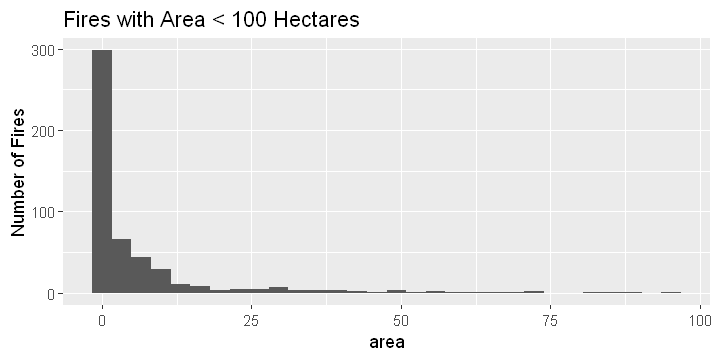

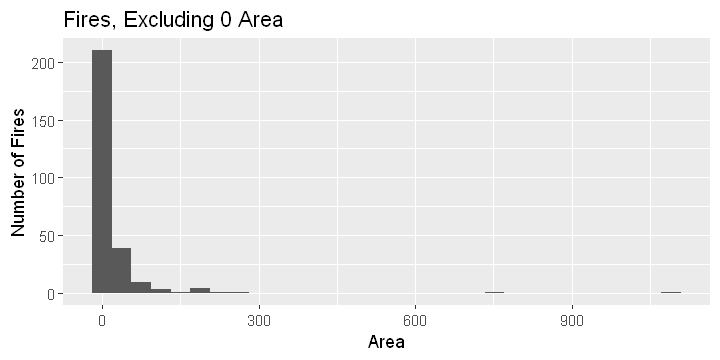

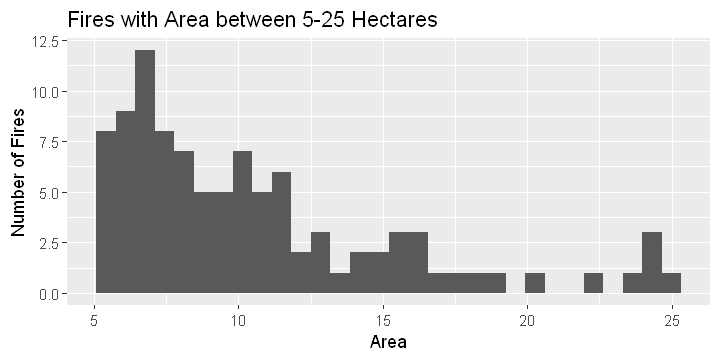

In [166]:
ggplot(data = fires_low_area) + aes(area) + geom_histogram(bins = 30) + labs(title = "Fires with Area < 100 Hectares", y = "Number of Fires")
ggplot(data = fires_non_zero_area) + aes(area) + geom_histogram(bins = 30) + labs(title = "Fires, Excluding 0 Area", x = "Area", y = "Number of Fires")
ggplot(data = fires_5_25) + aes(area) + geom_histogram(bins = 30) + labs(title = "Fires with Area between 5-25 Hectares", x = "Area", y = "Number of Fires")

### Analysis next steps

* Map fires geographically based on coordinates
* Create regression models to estimate relationships and predict fires.
* Use other data sets to compare against forest fires in other areas.